In [1]:
import Pkg;
Pkg.instantiate()
using DrugResponseModel

# import data from the path
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib")

# costt, ps = optimize_hill(conc_l, g1, g2, g1_0, g2_0, maxstep = 2E4)
ps = [54.4042, 0.496042, 0.0987498, 1.0264, 0.787628, 1.19336, 0.0104354, 0.00420917, 0.502323, 11.545, 28.5096];

┌ Info: Precompiling DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd]
└ @ Base loading.jl:1273


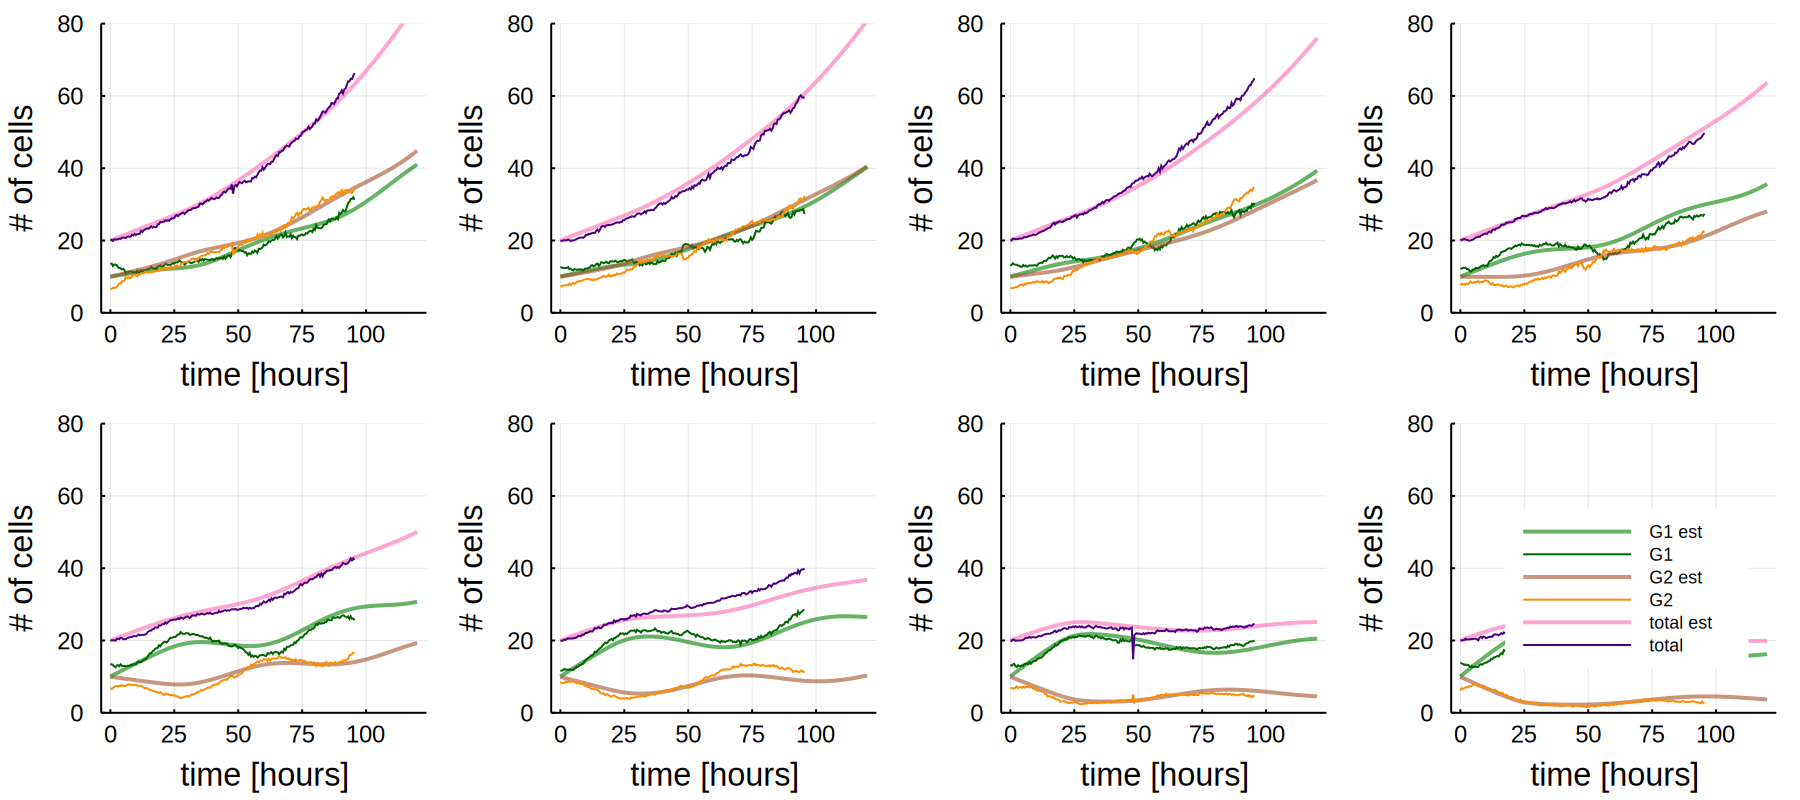

In [2]:
effects = getODEparams(ps, conc_l)
ODEplot_all(effects, g1, g2, g1_0, g2_0, pop)

In [5]:
result = zeros(50, 11)
paramRange = zeros(50, 11)
for k=1:11
    result[:, k], paramRange[:, k] = sensitivity(0.1*ps, conc_l, k, g1_0, g2_0, g1, g2)
end

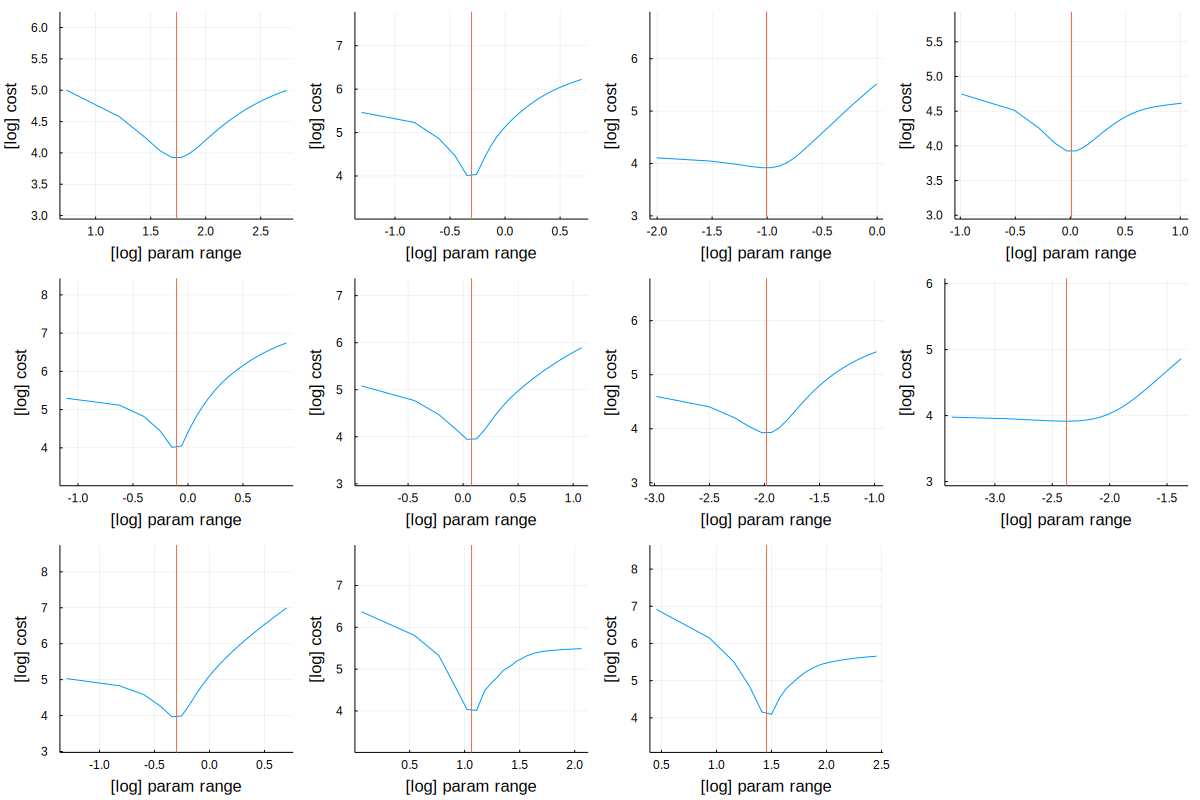

In [7]:
using Plots;
pl = [plotUnitSensitivity(log10.(paramRange[:, i]), log10.(result[:, i]), log10.(0.1*ps[i])) for i=1:11]
plot(pl...)
plot!(size=(1200, 800))